In [1]:
import numpy as np
import pandas as pd

# gene embeddings except TERC
gene_embeddings_324 = np.load('gene_emb_324_ht.npy')

In [2]:
import json

f = open('new_idx2sga.txt')

new_idx2sga = json.load(f)
new_sga2idx = {new_idx2sga[i]:i for i in new_idx2sga.keys()}

In [3]:
lapatinib_data_new = pd.read_csv('lapatinib_data_2.csv')
lapatinib_data_new

,DepMap_ID,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,APC,...,WHSC1,WHSC1L1,WT1,XPO1,XRCC2,ZNF217,ZNF703,TERC,AUC,binary_AUC
0,ACH-000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.984736,True
1,ACH-000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.987108,True
2,ACH-000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.991218,True
3,ACH-000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.971035,True
4,ACH-000007,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.982274,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,ACH-001702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.985085,True
646,ACH-001703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.970532,True
647,ACH-001711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.985580,True
648,ACH-001715,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.977712,True


In [4]:
f = open("../../data sets/train_celllines_v1_1111.txt", "r")
train_barcode = list(map(lambda x: x[:-1], f.readlines()))

f = open("../../data sets/test_celllines_v1_1111.txt", "r")
test_barcode = list(map(lambda x: x[:-1], f.readlines()))

In [5]:
train_index = lapatinib_data_new.loc[lapatinib_data_new.DepMap_ID.isin(train_barcode)].index.values
test_index = lapatinib_data_new.loc[lapatinib_data_new.DepMap_ID.isin(test_barcode)].index.values

In [6]:
sga_embeddings = []
for i in range(len(lapatinib_data_new)):
    mutation = []
    for j in lapatinib_data_new.columns[1:-2]:
        if lapatinib_data_new.loc[i, j] == 1:
            mutation.append(int(new_sga2idx[j])+1)
    sga_embeddings.append(np.array(np.sum(gene_embeddings_324[mutation], axis = 0)))
sga_embeddings = np.array(sga_embeddings)
sga_embeddings.shape

(650, 512)

In [7]:
sga_emb_df = pd.DataFrame(sga_embeddings)
sga_emb_df['binary_AUC'] = lapatinib_data_new['binary_AUC']
sga_emb_df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,binary_AUC
0,-0.416468,1.609976,-2.136673,0.431811,-0.903720,-0.080695,-2.481559,-0.631666,-0.844695,-1.361583,...,1.714644,-0.244924,2.067044,-0.819621,-0.395066,0.977033,1.332741,0.497226,-0.452736,True
1,0.336405,1.482067,-0.229434,2.024394,0.794163,-0.002057,-0.286745,-0.546506,0.740201,-0.766789,...,1.324594,-1.303668,0.283176,-0.116461,-0.282119,-0.921863,-0.378839,0.569786,-1.249650,True
2,1.558485,2.078349,-0.758606,-1.214817,0.666616,0.144464,-1.177057,0.606726,0.619151,-0.366571,...,1.512376,0.689376,-0.512899,-1.893188,-0.472608,1.435452,-0.547447,-0.377913,-1.415139,True
3,-0.063309,-0.369380,0.545211,-0.894942,-0.124881,2.535035,-1.747852,-0.248305,0.308209,-0.876904,...,2.399000,0.420979,-0.327897,-0.265959,0.270470,2.640533,1.107515,-0.268399,0.320735,True
4,-2.418199,1.907875,-2.069945,-1.403879,-0.761415,-0.270484,1.313799,0.077638,-1.134016,-1.280287,...,0.785548,-2.726915,-0.497010,1.897613,-1.131100,-0.681048,2.801827,-0.060734,1.584425,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,-0.281619,-1.457946,0.369041,0.159422,-0.437067,0.021916,-0.907197,-0.411183,0.983676,0.853418,...,-1.467813,0.343385,-0.395625,1.014190,-0.291096,-0.589987,0.803814,-0.195150,-0.613084,True
646,-1.383418,3.891608,1.207749,-3.565162,-0.191123,-0.057547,1.163719,2.088080,-0.285434,1.720273,...,-0.201829,-1.746228,-1.432961,-0.398487,0.947382,-1.334881,-1.745982,-0.401373,-0.651260,True
647,0.406263,3.645568,1.523828,-0.688164,0.307904,-0.669041,-0.751360,-1.554179,0.763656,1.779633,...,1.441088,-0.921475,0.252298,-0.644621,1.521864,1.877739,0.552933,-1.058217,-0.025256,True
648,3.032125,3.987071,0.988018,-0.166381,0.026873,-2.756047,0.977036,1.066496,0.388569,0.402670,...,0.274530,1.407055,0.041571,-0.997300,-0.683061,-0.621458,-0.047847,-0.769108,-0.444951,True


In [8]:
random_seed = 1

In [9]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

### using raw sparse SGA
X = sga_emb_df.loc[:, sga_emb_df.columns != 'binary_AUC'].to_numpy()
y = sga_emb_df['binary_AUC'].apply(lambda x: int(x)).to_numpy()

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = random_seed)
lr_model.fit(X_train_scaled, y_train)

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


LogisticRegressionCV(class_weight='balanced', cv=10, penalty='l1',
                     random_state=1, solver='liblinear')

0.78125


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


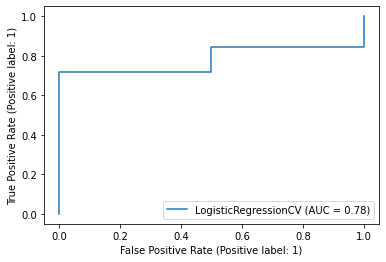

In [10]:
y_pred = lr_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test_scaled, y_test)

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


0.6953125


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


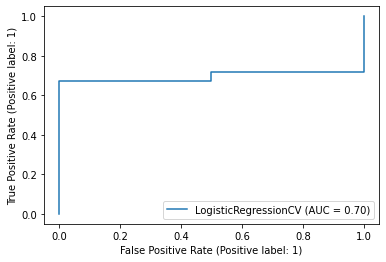

In [11]:
### using tanh embeddings
X = sga_emb_df.loc[:, sga_emb_df.columns != 'binary_AUC'].to_numpy()
y = sga_emb_df['binary_AUC'].apply(lambda x: int(x)).to_numpy()

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

X_train_scaled = np.tanh(X_train)
X_test_scaled = np.tanh(X_test)

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = random_seed)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test_scaled, y_test)

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


0.9140625


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


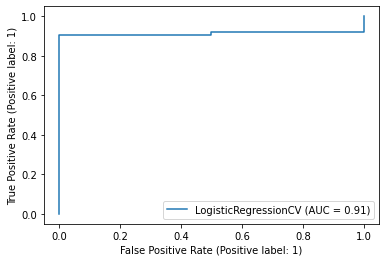

In [12]:
### using mutation data
X = lapatinib_data_new.loc[:, ~lapatinib_data_new.columns.isin(["DepMap_ID", "AUC", "binary_AUC"])].to_numpy()
y = lapatinib_data_new['binary_AUC'].apply(lambda x: int(x)).to_numpy()

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = random_seed)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test, y_test)

In [13]:
### finetuned gene embeddings except TERC
gene_embeddings_finetune_324 = np.load('gene_emb_finetune_324_ht.npy')

In [14]:
sga_embeddings_2 = []
for i in range(len(lapatinib_data_new)):
    mutation = []
    for j in lapatinib_data_new.columns[1:-2]:
        if lapatinib_data_new.loc[i, j] == 1:
            mutation.append(int(new_sga2idx[j])+1)
    sga_embeddings_2.append(np.array(np.sum(gene_embeddings_finetune_324[mutation], axis = 0)))
sga_embeddings_2 = np.array(sga_embeddings_2)
sga_embeddings_2.shape

(650, 512)

In [15]:
sga_emb_df_2 = pd.DataFrame(sga_embeddings_2)
sga_emb_df_2['binary_AUC'] = lapatinib_data_new['binary_AUC']
sga_emb_df_2

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,binary_AUC
0,-0.401949,-0.460355,0.129798,0.078462,-1.947838,0.159773,0.075487,1.150423,0.333026,-0.137204,...,0.310161,0.495092,-1.219147,-0.033177,1.809364,-0.406118,0.116039,-0.667105,0.393545,True
1,-0.100365,0.011410,0.312564,-0.375468,-0.516022,0.155777,0.476241,0.225944,-0.164785,-0.758682,...,0.448525,0.182481,-0.456465,-0.062439,0.181618,-0.140921,-0.266006,0.101152,0.370076,True
2,-0.503233,-0.194117,0.611112,-0.120861,-1.506535,0.707143,0.347542,1.058678,0.735673,-0.849688,...,0.957848,0.634875,-0.703855,-0.366297,1.342756,-0.796248,-0.638268,-0.703262,0.292354,True
3,-0.873238,0.271486,0.285254,-0.399779,-0.814977,0.535647,0.385981,0.721733,0.103220,-0.660072,...,0.538542,0.428504,-1.066553,-0.473757,0.788167,-0.676013,0.269919,-0.525316,0.461505,True
4,2.226708,-0.695703,-0.743883,0.937667,0.180532,-1.160804,-0.948623,-0.981389,-1.246937,0.965302,...,-0.223090,-0.211250,0.319733,1.208939,-0.112355,0.678587,0.264844,0.718939,0.413384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,-0.095997,-0.020140,0.051335,0.235515,-0.113219,-0.507771,-0.096928,0.106157,-0.551618,-0.235523,...,-0.125334,-0.373151,0.720479,0.010063,0.161626,0.426671,0.149415,0.554339,0.151295,True
646,1.662632,2.047518,0.090624,1.485917,1.214756,-1.507446,-1.480162,-1.287009,-1.821438,2.284247,...,-0.402621,-0.836494,1.553263,-0.837931,-0.515337,1.355846,1.116849,1.935780,0.027915,True
647,-0.558348,-0.011496,0.659555,-0.882464,-1.661759,0.907596,0.573110,1.762955,0.848096,-0.704888,...,0.803630,0.759777,-1.029643,-0.383295,1.744045,-0.845596,-0.436172,-0.619285,0.630648,True
648,0.920798,0.218399,-0.847509,1.260032,-0.286283,-0.369083,-0.169294,-0.144955,0.067795,-0.110640,...,0.035304,0.252148,1.022800,-0.077434,0.059627,1.171973,0.548097,0.679199,-0.277808,True


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


0.9609375


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


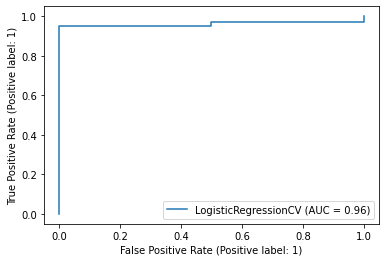

In [16]:
### using raw sparse SGA
X = sga_emb_df_2.loc[:, sga_emb_df_2.columns != 'binary_AUC'].to_numpy()
y = sga_emb_df_2['binary_AUC'].apply(lambda x: int(x)).to_numpy()

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = random_seed)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test_scaled, y_test)

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


0.9375


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


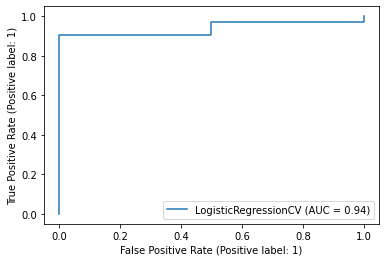

In [17]:
### using tanh embeddings
X = sga_emb_df_2.loc[:, sga_emb_df_2.columns != 'binary_AUC'].to_numpy()
y = sga_emb_df_2['binary_AUC'].apply(lambda x: int(x)).to_numpy()

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

X_train_scaled = np.tanh(X_train)
X_test_scaled = np.tanh(X_test)

lr_model = LogisticRegressionCV(cv=10, penalty = 'l1', class_weight = 'balanced', solver='liblinear', random_state = random_seed)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

metrics.plot_roc_curve(lr_model, X_test_scaled, y_test)

In [18]:
y_pred = lr_model.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      0.98      0.98        64

    accuracy                           0.95        66
   macro avg       0.48      0.49      0.49        66
weighted avg       0.94      0.95      0.95        66



In [19]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 0,  2],
       [ 1, 63]], dtype=int64)

In [20]:
np.unique(y_test, return_counts = True)

(array([0, 1], dtype=int64), array([ 2, 64], dtype=int64))